## Imports

In [1]:
import numpy as np
from torch.utils.data import DataLoader
import pandas as pd
from sklearn import metrics
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.manifold import TSNE 
from sklearn.cluster import DBSCAN 
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from sklearn.metrics.cluster import adjusted_rand_score

## Download Resources

In [2]:
Fashion_mnist_test_transform = transforms.Compose([transforms.ToTensor()])

testset_Fashion_mnist = datasets.FashionMNIST(root='./data', train=False, download=True, transform=Fashion_mnist_test_transform)

FM_test = DataLoader(testset_Fashion_mnist, batch_size=32, shuffle=False, num_workers=2)
FM_test_images = []
FM_test_labels = []

for batch in FM_test:
    images, labels = batch
    images_flat = images.view(images.shape[0], -1)
    FM_test_images.append(images_flat.numpy())
    FM_test_labels.append(labels.numpy())
FM_test_images = np.vstack(FM_test_images)
FM_test_labels = np.concatenate(FM_test_labels)

X_ = pd.DataFrame(data=FM_test_images) # test data
y_ = pd.Series(data=FM_test_labels) # test label

# Function Definitions

## PCA for dimension reduction

In [3]:
def pca_run(n_components):
  if n_components == 784:
      test_PCA = pd.DataFrame(data = X_)
  else:
      pca = PCA(n_components= n_components)
      test_PCA = pca.fit_transform(X_)
      test_PCA = pd.DataFrame(data = test_PCA)

  return test_PCA

## t-SNE for visualization

In [4]:
def tsne_visualize(X, y):
  X_ = pd.DataFrame(data=X, index=X.index)
  y_ = y
  y_.name = 'Label'
  data = pd.concat((X_, y_), axis=1, join="inner")
  data = data.sample(n=100)
  data = data.reset_index(drop=True)
  X_ = data.loc[:, data.columns != "Label"].reset_index(drop=True)
  y_ = data.loc[:,["Label"]].reset_index(drop=True)

  n_components = 2
  learning_rate = 300
  perplexity = 30
  early_exaggeration = 12
  init = 'random'

  tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, perplexity=perplexity, early_exaggeration=early_exaggeration, init=init)
  X_tsne = tSNE.fit_transform(X_)
  X_tsne = pd.DataFrame(data=X_tsne)
  data_tsne = pd.concat((X_tsne.loc[:,:], y_), axis=1, join="inner")
  data_tsne.columns = ["x-axis", "y-axis", "Label"]

  sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=data_tsne, fit_reg=False, height=8)
  plt.title("Clustering Result")
  plt.grid()

## other functions

In [ ]:
def result_kmeans(X):
  kmeans = KMeans(n_clusters=10)
  kmeans.fit(X)
  return pd.Series(kmeans.labels_)

def result_dbscan(X, min_samples, eps):
  dbscan = DBSCAN(min_samples=min_samples, eps=eps)
  dbscan.fit(X=X)
  score = adjusted_rand_score(y_, pd.Series(dbscan.labels_))
  score = adjusted_rand_score(y_, pd.Series(dbscan.fit_predict(X=X)))
  
  dbscan = DBSCAN(min_samples=min_samples, eps=eps)
  dbscan.fit_predict(X=X)
  return pd.Series(dbscan.labels_)

In [6]:
def run_kmeans(dimension):
  X_pca = pca_run(dimension)
  y_kmean = result_kmeans(X=X_)
  score = adjusted_rand_score(y_, y_kmean)
  print(f"KMeans ARI : {score}")
  tsne_visualize(X_pca, y_kmean)

def run_dbscan(dimension, min_samples, eps):
  X_pca = pca_run(dimension)
  y_dbscan = result_dbscan(X=X_, min_samples=min_samples, eps=eps)
  score = adjusted_rand_score(y_, y_dbscan)
  print(f"DBSCAN ARI : {score}")
  tsne_visualize(X_pca, y_dbscan)

# Execution

## Dimension 10

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans ARI : 0.34019700935922437


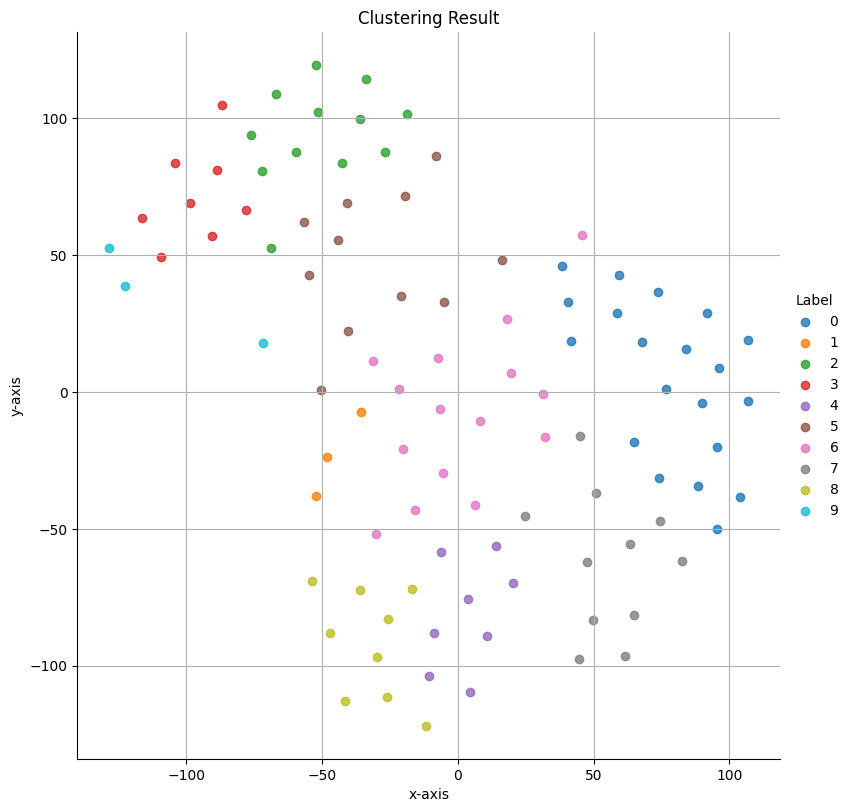

In [7]:
run_kmeans(dimension=10)

DBSCAN ARI : 0.05519436514842444


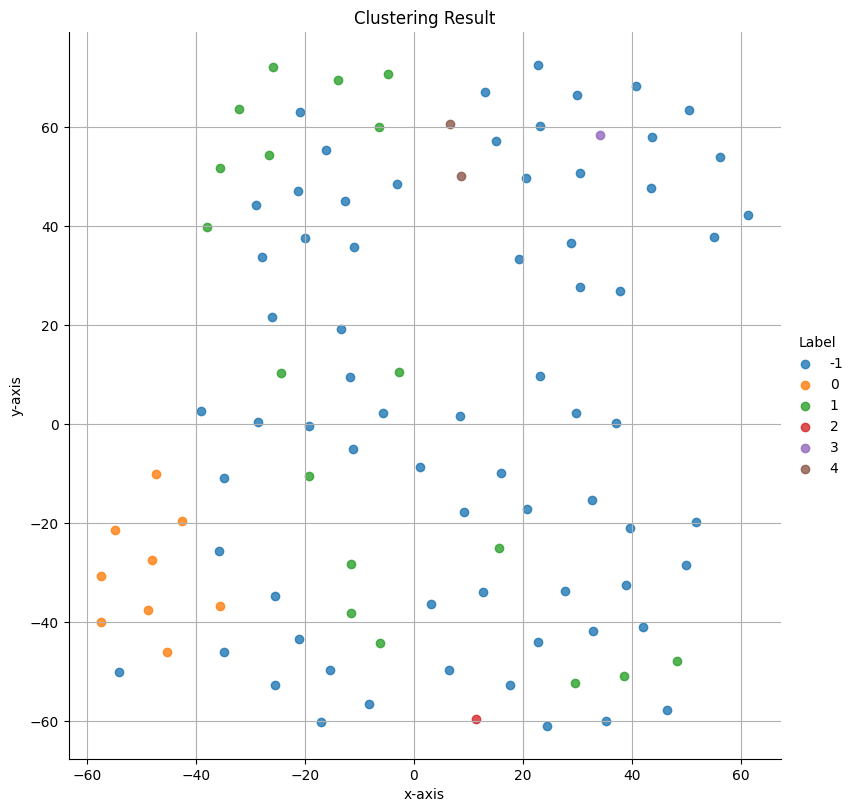

In [8]:
run_dbscan(dimension=10, min_samples=12, eps=3.8)

## Dimension 50

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans ARI : 0.34012385059224015


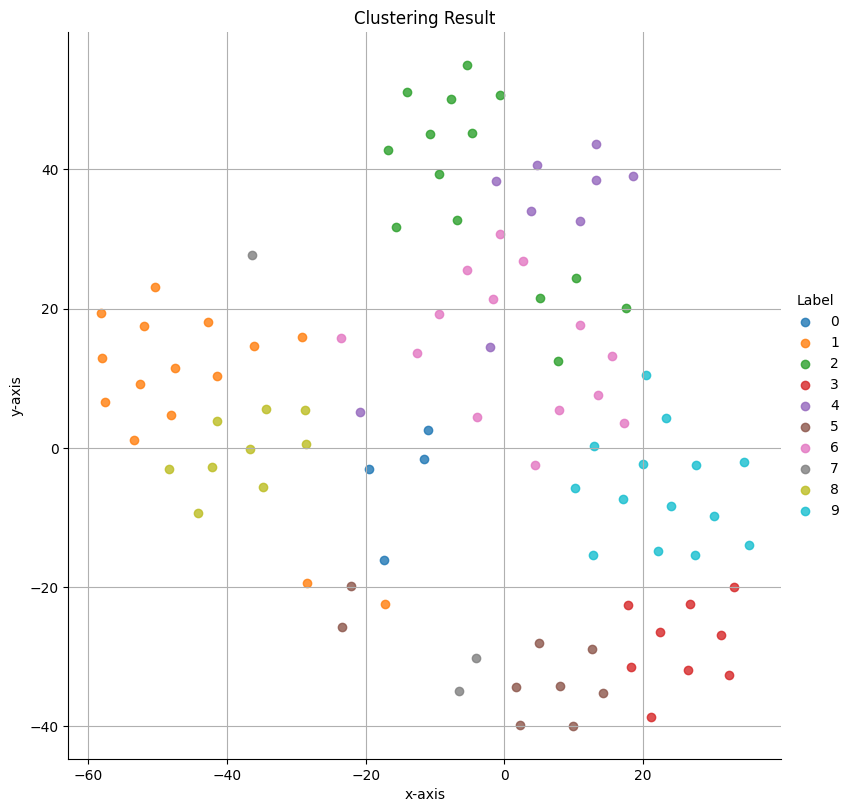

In [9]:
run_kmeans(dimension=50)

DBSCAN ARI : 0.05519436514842444


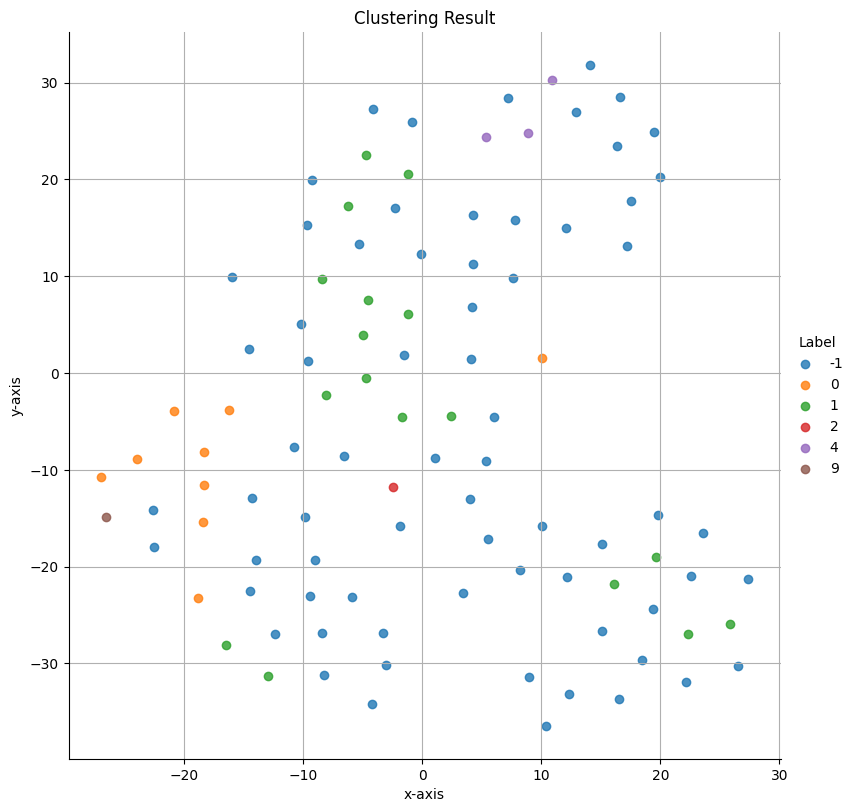

In [10]:
run_dbscan(dimension=50, min_samples=12, eps=3.8)

## Dimension 100

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans ARI : 0.35134515966382573


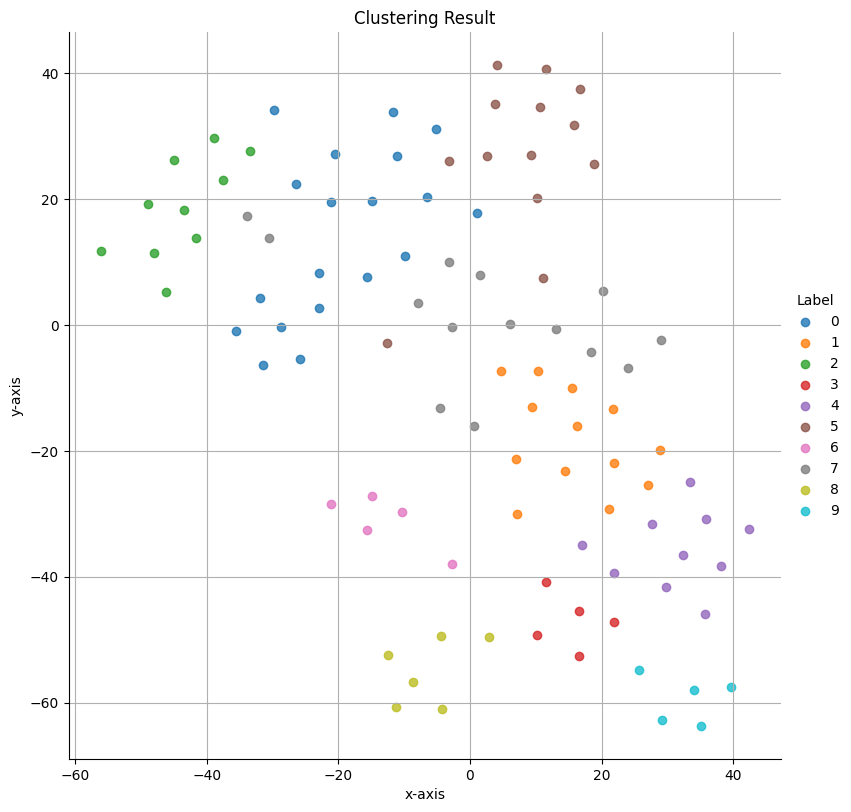

In [11]:
run_kmeans(dimension=100)

DBSCAN ARI : 0.05519436514842444


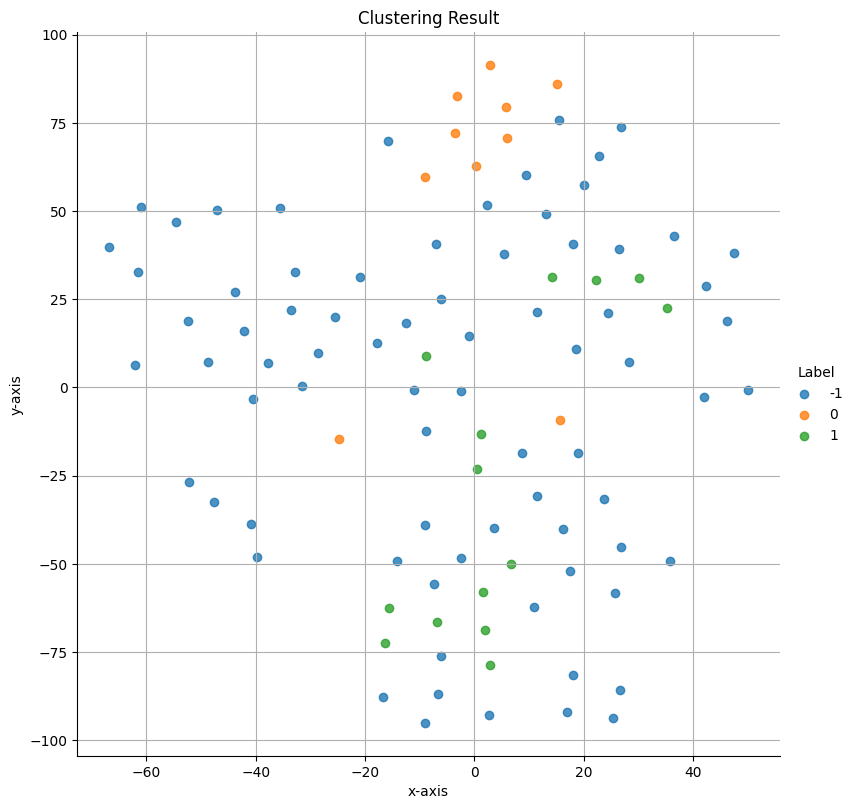

In [12]:
run_dbscan(dimension=100, min_samples=12, eps=3.8)

## Dimension 784

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans ARI : 0.35134515966382573


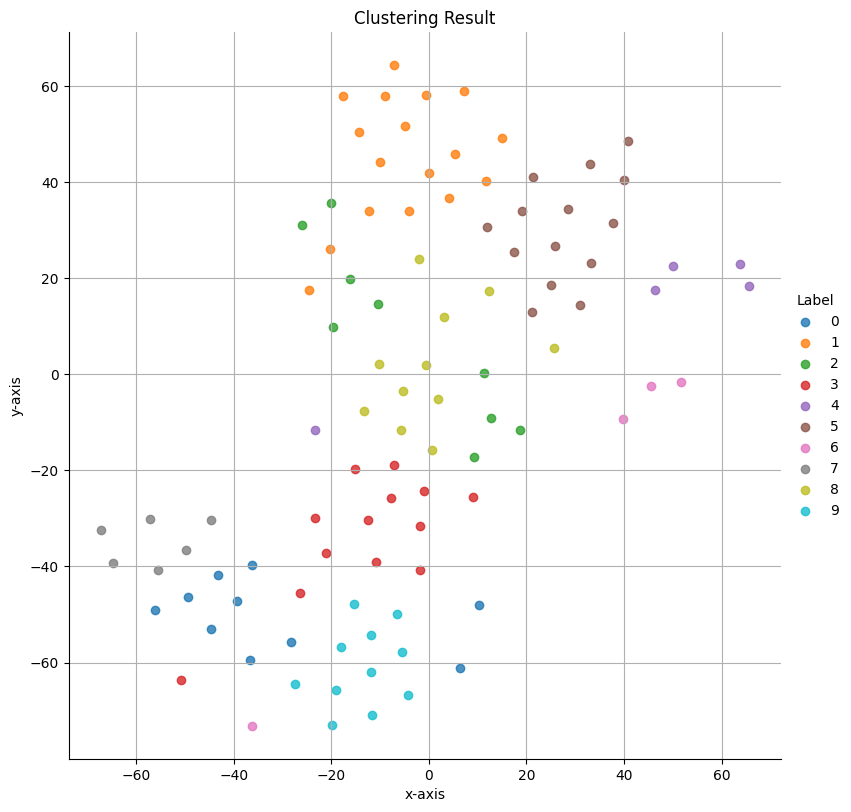

In [13]:
run_kmeans(dimension=784)

DBSCAN ARI : 0.05519436514842444


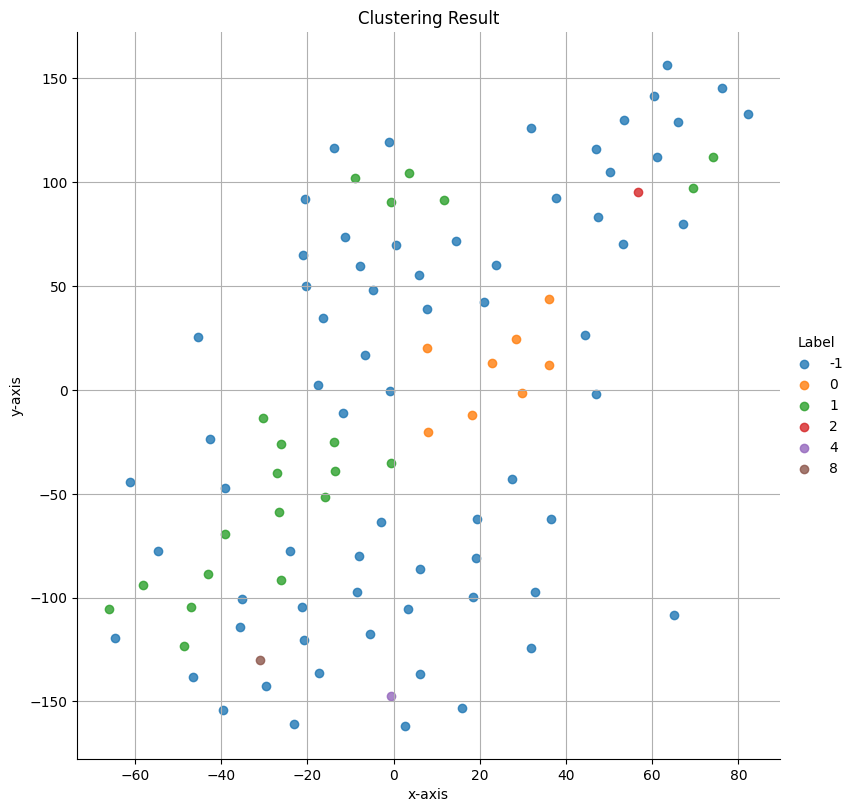

In [14]:
run_dbscan(dimension=784, min_samples=12, eps=3.8)